# Task 1 – Exploratory Data Analysis & Statistical Insights  
**AlphaCare Insurance Solutions (ACIS) | South African Motor Insurance | Dec 2025**  
**Nathanael Dereje**

---

### 1. Data Loading & Cleaning
- Raw transactional data: **1,000,098 rows** (Feb 2014 – Aug 2015)  
- Fixed mixed dtypes (`CapitalOutstanding`, `NewVehicle`)  
- Optimized categories → memory reduced from ~390 MB → ~120 MB  
- Cleaned dataset saved as `insurance_cleaned.parquet` for 10× faster loading  
- Added `TransactionYearMonth` for temporal analysis

In [2]:
import sys
import os
# Add project root (one directory above "notebooks")
sys.path.append(os.path.abspath(".."))

In [3]:
# import necessary libraries
import pandas as pd
from scripts.load_and_clean import load_insurance_data
from scripts.eda_metrics import portfolio_loss_ratio, loss_ratio_by,describe_financials, print_extremes,temporal_trends, loss_ratio_by_make, loss_ratio_by_model
from scripts.visualizations import plot_financial_distributions,plot_loss_ratio_box,plot_temporal_trends,plot_top_risky_makes

In [4]:
# load data and check
DATA_PATH = "../data/raw/MachineLearningRating_v3.txt"   # adjust if needed
df = load_insurance_data(DATA_PATH)
df.info()

DATA LOADED SUCCESSFULLY!
Shape: (1000098, 53)
Memory usage: 1509.13 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 53 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null 

### 2. Exploratory Data Analysis (EDA)


In [5]:
# -------------------------
# 1. Basic distribution & loss ratio computations
# -------------------------
 # Overall Portfolio
portfolio_loss_ratio(df)

# Province (Riskiest)
prov = loss_ratio_by(df, "Province", min_transactions=1000)
print(prov.head(6))


# Vehicle Type
veh = loss_ratio_by(df, "VehicleType")
print(veh.head(8))

# Gender
gender = loss_ratio_by(df, "Gender", min_transactions=2000)
gender


OVERALL PORTFOLIO LOSS RATIO (Feb 2014 – Aug 2015)
Total Premium Collected : R61,911,563
Total Claims Paid       : R64,867,546
Overall Loss Ratio      : 1.0477 → 104.77%
        Province  TotalPremium  TotalClaims  Transactions  LossRatio
0        Gauteng   24053774.58  29394148.48        393865    1.22202
1  KwaZulu-Natal   13209079.81  14301382.45        169781    1.08269
2   Western Cape    9806558.53  10389773.74        170796    1.05947
3     North West    7490508.18   5920250.00        143287    0.79037
4     Mpumalanga    2836291.94   2044675.36         52718    0.72090
5     Free State     521363.24    354922.27          8099    0.68076
         VehicleType  TotalPremium  TotalClaims  Transactions  LossRatio
0   Heavy Commercial     460947.86    750474.58          7401    1.62811
1  Medium Commercial    3922745.55   4119866.90         53985    1.05025
2  Passenger Vehicle   56642016.58  59372069.68        933598    1.04820
3   Light Commercial     260497.52     60452.50       

c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\eda_metrics.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(by_column).agg(
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\eda_metrics.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(by_column).agg(
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\eda_metrics.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adop

,Gender,TotalPremium,TotalClaims,Transactions,LossRatio
0,Not specified,59202752.22,62714103.07,940990,1.05931
1,Male,1580142.80,1396703.92,42817,0.88391
2,Female,304480.55,250246.10,6755,0.82188


In [6]:
print("\nKEY FINANCIAL VARIABLES – FULL SUMMARY")
print(describe_financials(df))
print_extremes(df)


KEY FINANCIAL VARIABLES – FULL SUMMARY
                              count           mean             std  \
TotalPremium              1000098.0      61.905496      230.284513   
TotalClaims               1000098.0       64.86119     2384.074695   
CalculatedPremiumPerTerm  1000098.0     117.875691      399.701721   
SumInsured                1000098.0  604172.732589  1508331.837996   
CustomValueEstimate        220456.0  225531.129942   564515.749848   
CapitalOutstanding         999776.0   52605.220796   111417.190825   

                                   min       50%        75%         90%  \
TotalPremium               -782.576754  2.178333  21.929825  210.594298   
TotalClaims              -12002.412281       0.0        0.0         0.0   
CalculatedPremiumPerTerm           0.0    8.4369       90.0    379.3479   
SumInsured                        0.01    7500.0   250000.0   5000000.0   
CustomValueEstimate            20000.0  220000.0   280000.0    342100.0   
CapitalOutstanding 

In [7]:
# -------------------------
# 3. Temporal trends
# -------------------------
monthly = temporal_trends(df)
monthly

,TransactionYearMonth,TotalPremium,TotalClaims,Policies,LossRatio,ClaimFrequency
0,2013-10,3.710635e+02,0.000000e+00,5,0.000000,0.000000
1,2013-11,2.130747e+04,5.058508e+04,78,2.374054,0.012821
2,2013-12,4.248475e+04,9.283386e+03,100,0.218511,0.030000
3,2014-01,5.408520e+04,1.243686e+04,126,0.229949,0.015873
4,2014-02,6.078844e+04,6.298931e+04,148,1.036205,0.027027
5,2014-03,9.857719e+04,3.227850e+05,264,3.274439,0.034091
6,2014-04,2.342743e+05,3.068636e+05,474,1.309847,0.031646
7,2014-05,3.759117e+05,5.180427e+05,659,1.378097,0.033384
8,2014-06,4.862194e+05,5.045364e+05,826,1.037672,0.027845
9,2014-07,6.092661e+05,4.289822e+05,1036,0.704097,0.023166


In [8]:

makes = loss_ratio_by_make(df, min_policies=50)
print(makes.head())

top_make = makes.iloc[0]['make']
print(loss_ratio_by_model(df, top_make))


                                   make   TotalPremium    TotalClaims  Count  \
40  SUZUKI                                27012.567538  171210.894737    408   
22  JMC                                    5635.786282   23002.175439    120   
18                              HYUNDAI  113615.556013  453307.938596   2602   
35                             POLARSUN   41029.401996  125197.843333    934   
26                            MARCOPOLO    2665.651421    7996.535088     51   

    LossRatio  
40   6.338194  
22   4.081449  
18   3.989840  
35   3.051418  
26   2.999843  
              Model  TotalPremium    TotalClaims  Count  LossRatio
182   ERTIGA 1.4 GA  16053.576808  171210.894737    271  10.664969
183  ERTIGA 1.4 GLX  10915.131081       0.000000    136   0.000000


c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\eda_metrics.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  make_stats = df.groupby('make').agg(
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\eda_metrics.py:238: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_stats = subset.groupby('Model').agg(


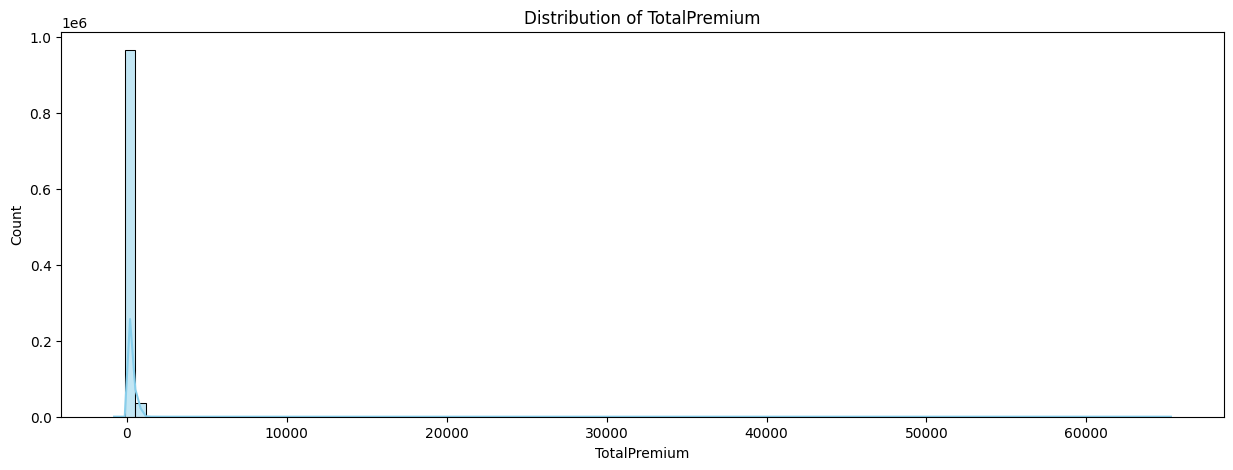

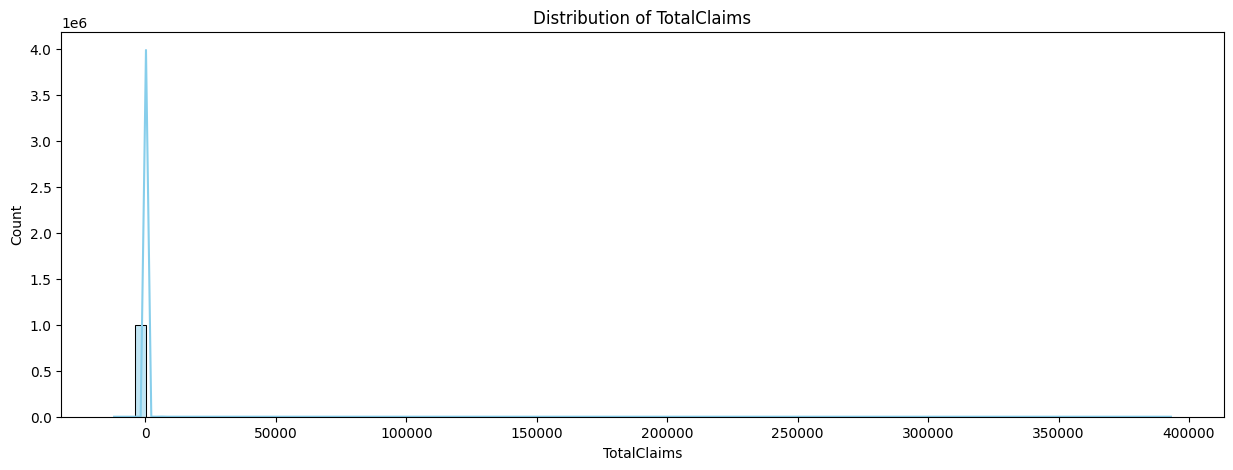

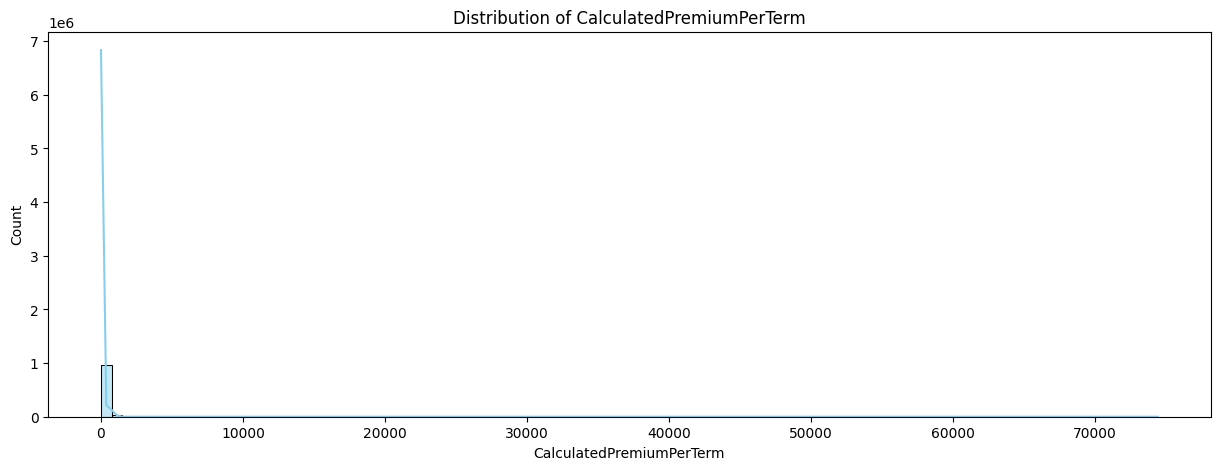

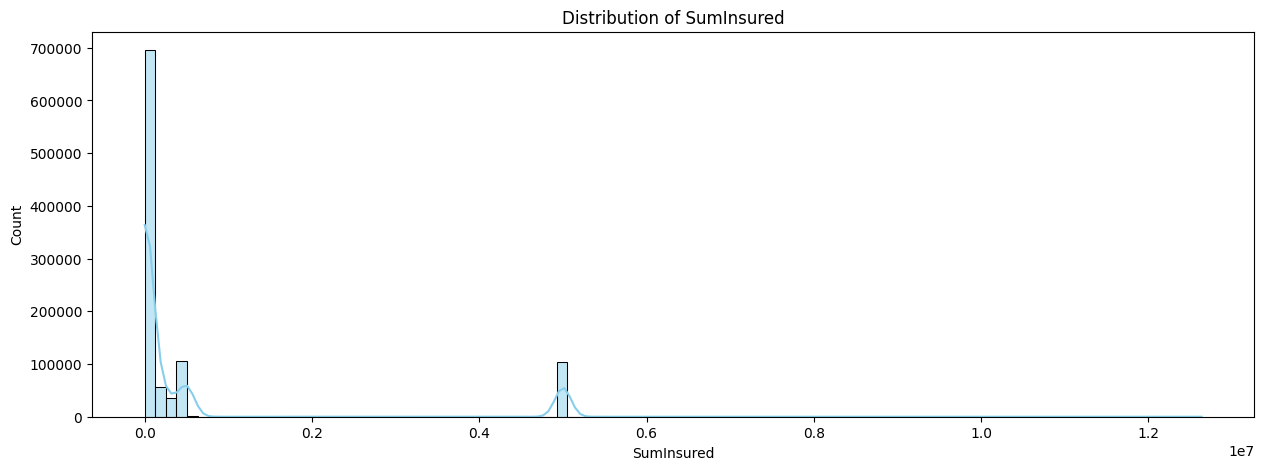

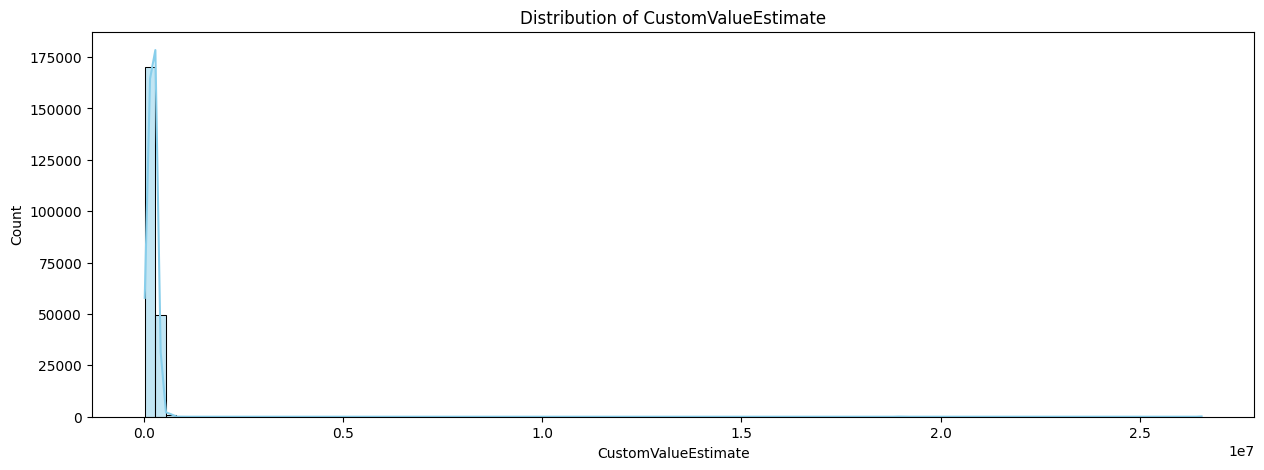

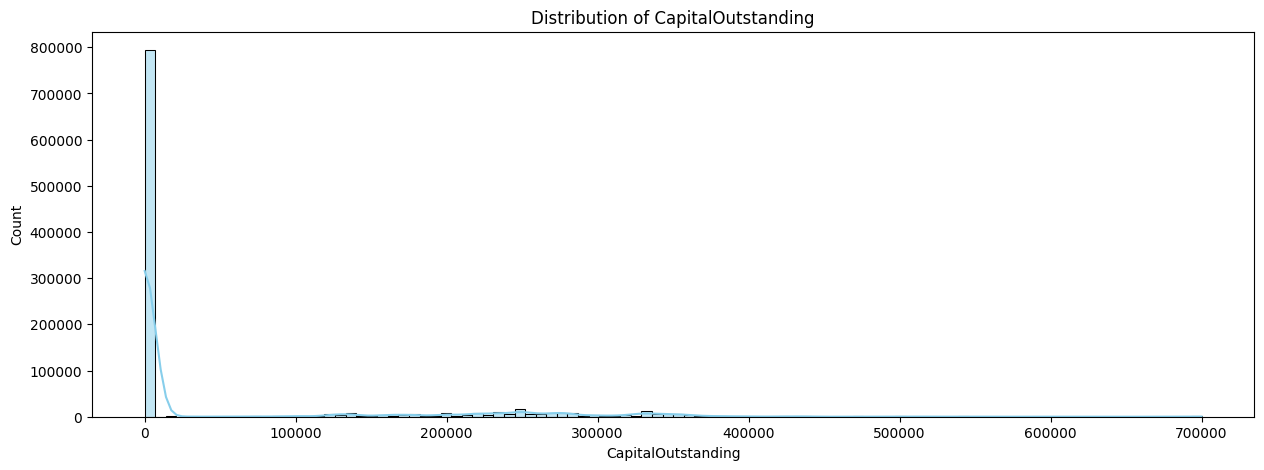

c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\visualizations.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(by_column).agg(


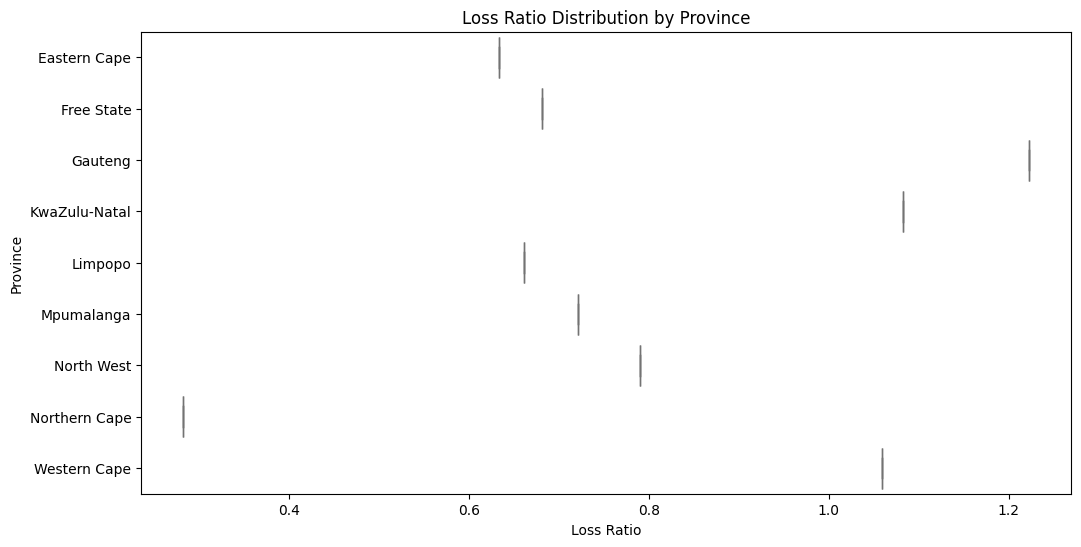

c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\visualizations.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(by_column).agg(


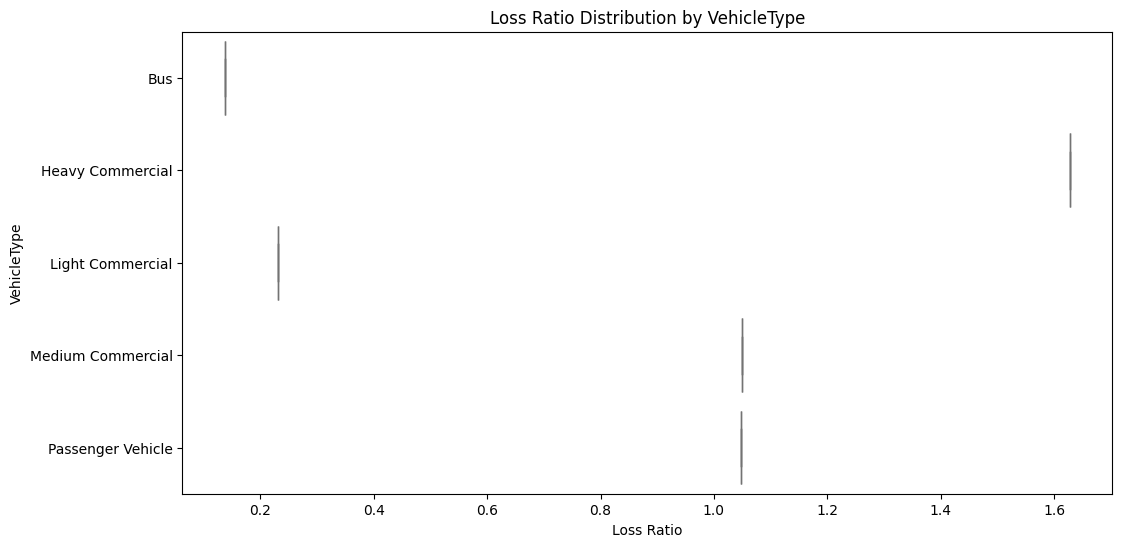

c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\visualizations.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(by_column).agg(


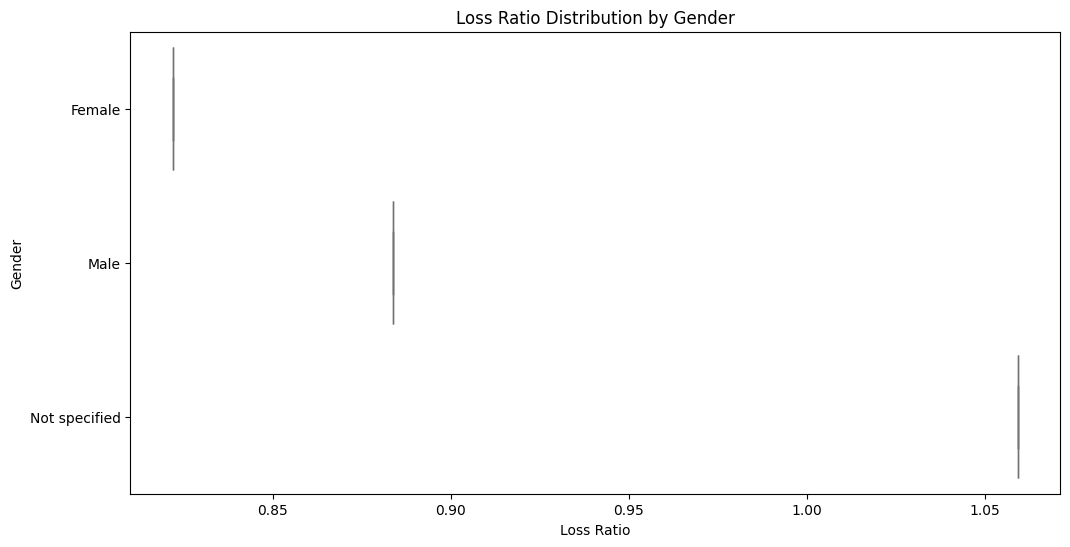

TypeError: Invalid object type at position 0

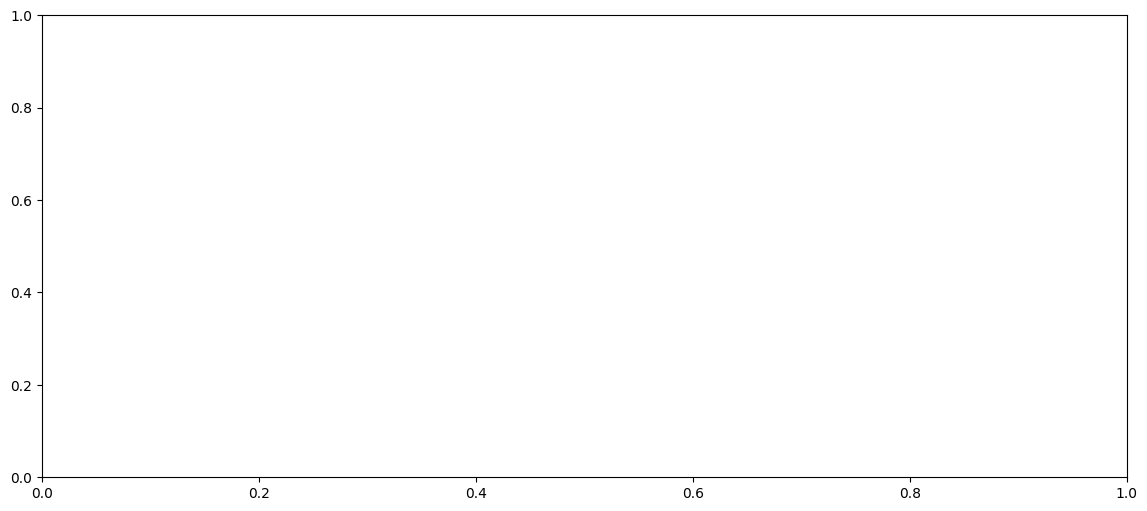

In [9]:
plot_financial_distributions(df)
plot_loss_ratio_box(df, "Province", min_transactions=1000)
plot_loss_ratio_box(df, "VehicleType")
plot_loss_ratio_box(df, "Gender", min_transactions=2000)
plot_temporal_trends(monthly)
plot_top_risky_makes(makes, top_n=10)

In [41]:
# -------------------------
# 5. Statistical tests for key hypotheses (examples + code)
# -------------------------
print("\nStatistical testing suggestions and results (automated):")
from scipy import stats
# H0: There are no risk differences across provinces (Claim Frequency)
# Build contingency table: province x has_claim (0/1)
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)
prov_table = pd.crosstab(df['Province'], df['HasClaim'])
chi2, p_chi2, dof, exp = stats.chi2_contingency(prov_table)
print(f"H0 (no claim frequency diff across provinces) -- chi2 p-value = {p_chi2:.4g}")

# H0: There are no risk differences between zipcodes (use PostalCode)
# If many postal codes, do a random sample of top N postal codes by count to keep tests stable
top_postal = df['PostalCode'].value_counts().nlargest(20).index
pc_table = pd.crosstab(df[df['PostalCode'].isin(top_postal)]['PostalCode'],
                       df[df['PostalCode'].isin(top_postal)]['HasClaim'])
chi2_pc, p_pc, _, _ = stats.chi2_contingency(pc_table)
print(f"H0 (no claim frequency diff across top-20 postal codes) -- chi2 p-value = {p_pc:.4g}")

# H0: There is no significant margin (TotalPremium-TotalClaims) difference between zip codes
df['Margin'] = df['TotalPremium'] - df['TotalClaims']
# ANOVA across top postal codes
samples = [df[df['PostalCode']==pc]['Margin'].dropna() for pc in top_postal]
# Kruskal if not normal:
kr_pval = stats.kruskal(*[s[s.notnull()] for s in samples])[1]
print(f"H0 (no margin diff across top-20 postal codes) -- Kruskal p-value = {kr_pval:.4g}")

# H0: No significant risk difference between Women and Men (Claim Frequency)
gender_table = pd.crosstab(df['Gender'], df['HasClaim'])
chi2_g, p_g, _, _ = stats.chi2_contingency(gender_table)
print(f"H0 (no claim frequency diff between genders) -- chi2 p-value = {p_g:.4g}")


Statistical testing suggestions and results (automated):
H0 (no claim frequency diff across provinces) -- chi2 p-value = 4.405e-06
H0 (no claim frequency diff across top-20 postal codes) -- chi2 p-value = 8.687e-06
H0 (no margin diff across top-20 postal codes) -- Kruskal p-value = 0
H0 (no claim frequency diff between genders) -- chi2 p-value = 0.09035


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
# CONFIG
DATA_PATH = "../data/raw/MachineLearningRating_v3.txt"  # adjust if needed
FIG_DIR = "../reports/figures"
os.makedirs(FIG_DIR, exist_ok=True)
# -------------------------
# 6. Plots (three required creative plots)
# -------------------------

# Plot 1: Monthly Loss Ratio + Claim Frequency (dual axis)
plt.figure(figsize=(10,5))
ax = plt.gca()
monthly_plot = monthly.sort_values('TransactionYearMonth')
ax.plot(monthly_plot['TransactionYearMonth'].astype(str), monthly_plot['LossRatio'], marker='o', label='Loss Ratio')
ax.set_ylabel('Loss Ratio')
ax.set_xlabel('Month')
ax.tick_params(axis='x', rotation=45)
ax2 = ax.twinx()
ax2.plot(monthly_plot['TransactionYearMonth'].astype(str), monthly_plot['ClaimFrequency'], marker='s', linestyle='--', label='Claim Frequency')
ax2.set_ylabel('Claim Frequency')
ax.set_title('Monthly Loss Ratio and Claim Frequency')
# legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "01_monthly_lossratio_claimfreq.png"))
plt.close()

# Plot 2: Province Loss Ratio bar chart (sorted), annotate premium volume
plt.figure(figsize=(10,6))
prov_plot = prov.copy()
prov_plot['TotalPremium_m'] = prov_plot['TotalPremium']/1e6
prov_plot = prov_plot.sort_values('LossRatio')
sns.barplot(x='LossRatio', y='Province', data=prov_plot, orient='h')
plt.xlabel('Loss Ratio')
plt.title('Loss Ratio by Province (sorted)')
# annotate premium
for i, row in prov_plot.reset_index().iterrows():
    plt.text(row['LossRatio'] + 0.002, i, f"Premium: R{row['TotalPremium_m']:.1f}M", va='center')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "02_province_lossratio_bar.png"))
plt.close()

# Plot 3: TotalClaims vs CustomValueEstimate scatter (log scale), show outliers
plt.figure(figsize=(8,6))
sub = df.sample(n=min(50000, len(df)), random_state=42)  # sample for plotting speed
plt.scatter(sub['CustomValueEstimate'].replace({0:np.nan}), sub['TotalClaims'], alpha=0.3, s=6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('CustomValueEstimate (log scale)')
plt.ylabel('TotalClaims (log scale)')
plt.title('TotalClaims vs CustomValueEstimate (log-log) — sample')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "03_claims_vs_value_log_scatter.png"))
plt.close()

print("\nPlots saved to:", FIG_DIR)


Plots saved to: ../reports/figures


In [47]:
# Plot 3: TotalClaims vs CustomValueEstimate scatter (log scale), show outliers
plt.figure(figsize=(8,6))
sub = df.sample(n=min(50000, len(df)), random_state=42)  # sample for plotting speed
plt.scatter(df['CustomValueEstimate'].replace({0:np.nan}), df['TotalClaims'], alpha=0.3, s=6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('CustomValueEstimate (log scale)')
plt.ylabel('TotalClaims (log scale)')
plt.title('TotalClaims vs CustomValueEstimate (log-log) — sample')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "03_claims_vs_value_log_scatter.png"))
plt.close()